In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #3D散布図の描画
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数
from sklearn.model_selection import KFold # 交差検証法に関する関数
from sklearn.metrics import mean_absolute_error # 回帰問題における性能評価に関する関数
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

In [21]:
df_cloudfounding= pd.read_csv(r"C:/Users/N388/Desktop/kickstarter-projects (1)/ks-projects-201801.csv")
df_f18 = df_cloudfounding

In [22]:
display(df_cloudfounding.head())
df_cloudfounding.describe()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [23]:
#欠損値削除
df_f18_dna = df_f18.dropna(how='any')

In [24]:
#成功だけを抽出したDFと失敗だけを抽出したDF
df_f18_success = df_f18_dna[df_f18_dna['state']=='successful']
df_f18_failed =  df_f18_dna[df_f18_dna['state']=='failed']

In [25]:
#両方を結合
df_f18_SorF = pd.concat([df_f18_success,df_f18_failed])
#stateの要素の個数を数えてみる。
df_f18_SorF['state'].value_counts()

failed        197611
successful    133851
Name: state, dtype: int64

In [26]:
#LabelEncoderのインスタンスを生成
le= LabelEncoder()

#categoryに出てくるカテゴリを覚えて
#categoryを数値に変換
le = le.fit(df_f18_SorF['category'])
df_f18_SorF['category'] = le.transform(df_f18_SorF['category'])

#main_categoryに出てくるカテゴリを覚えて
#main_categoryを数値に変換
le = le.fit(df_f18_SorF['main_category'])
df_f18_SorF['main_category'] = le.transform(df_f18_SorF['main_category'])

#currencyに出てくるカテゴリを覚えて
#currencyを数値に変換
le = le.fit(df_f18_SorF['currency'])
df_f18_SorF['currency'] = le.transform(df_f18_SorF['currency'])

#stateに出てくるカテゴリを覚えて
#stateを数値に変換
le = le.fit(df_f18_SorF['state'])
df_f18_SorF['state'] = le.transform(df_f18_SorF['state'])

#countryに出てくるカテゴリを覚えて
#countryを数値に変換
le = le.fit(df_f18_SorF['country'])
df_f18_SorF['country'] = le.transform(df_f18_SorF['country'])

df_f18_SorF.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
5,1000014025,Monarch Espresso Bar,123,7,13,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,21,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,58,7,13,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,1,16,21,1205.00,1205.00,1000.00
11,100005484,Lisa Lim New CD!,72,10,13,2013-04-08,12500.0,2013-03-09 06:42:58,12700.0,1,100,21,12700.00,12700.00,12500.00
14,1000057089,Tombstone: Old West tabletop game and miniatur...,136,8,5,2017-05-03,5000.0,2017-04-05 19:44:18,94175.0,1,761,9,57763.78,121857.33,6469.73
18,1000070642,Mike Corey's Darkness & Light Album,90,10,13,2012-08-17,250.0,2012-08-02 14:11:32,250.0,1,7,21,250.00,250.00,250.00


In [27]:
###########ここまでが前処理##############

In [50]:
#LASSOによる特徴選択
# estimatorにモデルをセット
# LassoCVを使って、正則化の強さは自動決定
estimator = LassoCV(normalize=True, cv=10)

# モデルの情報を使って特徴選択を行う場合は、SelectFromModelを使う
# 今回は係数が1e-5以下である特徴を削除する
# 係数のしきい値はthresholdで指定する
sfm = SelectFromModel(estimator, threshold=1e-5)  #重要度の重みに基づいて機能を選択するためのメタトランス。

In [51]:
train_label = df_f18_SorF["state"]
train_data = df_f18_SorF.drop(["state","ID","name","deadline","launched"], axis=1)

y = train_label.values
X = train_data.values

# fitで特徴選択を実行
sfm.fit(X, y)

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001,
                                  fit_intercept=True, max_iter=1000,
                                  n_alphas=100, n_jobs=None, normalize=True,
                                  positive=False, precompute='auto',
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, verbose=False),
                max_features=None, norm_order=1, prefit=False, threshold=1e-05)

In [52]:
# get_support関数で使用する特徴のインデックスを使用
# Trueになっている特徴が使用する特徴
sfm.get_support()

array([ True,  True,  True, False, False,  True, False, False, False,
       False])

In [53]:
# 削除すべき特徴の名前を取得 
removed_idx  = ~sfm.get_support()
train_data.columns[removed_idx]

Index(['goal', 'pledged', 'country', 'usd pledged', 'usd_pledged_real',
       'usd_goal_real'],
      dtype='object')

In [54]:
# LASSOで得た各特徴の係数の値を確認してみよう
# 係数の絶対値を取得
abs_coef = np.abs(sfm.estimator_.coef_)
abs_coef

array([3.65903044e-04, 4.45909499e-03, 6.93458011e-03, 9.99897942e-09,
       2.08415260e-07, 4.78180596e-05, 0.00000000e+00, 3.30782921e-08,
       0.00000000e+00, 0.00000000e+00])

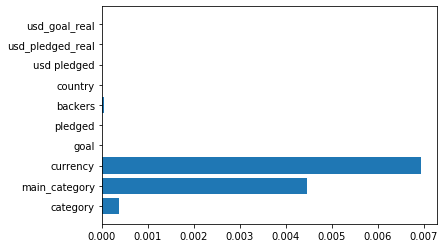

In [55]:
# 係数を棒グラフで表示
plt.barh(np.arange(0, len(abs_coef)), abs_coef, tick_label=train_data.columns.values)
plt.show()

In [67]:
#　ラベルデータとして’state’を採用する。

train_label = df_f18_SorF['state']



#　Leakageになりそうなカラム、相関が強いカラムをドロップする

train_data = df_f18_SorF.drop(['state','name','deadline','goal','launched','pledged','backers','country','goal', 'pledged', 'country', 'usd pledged', 'usd_pledged_real'], axis=1)


#　Lassoで削除するべき特徴量に選ばれたカラムをドロップする

#train_data = train_data.drop(train_data.columns[removed_idx], axis=1)



#目的変数'state'を正解としてyに格納

y = train_label.values


#カラムをドロップした説明変数を、Xに格納

X = train_data.values



# 全データのうち、30%をテストデータにする

test_size = 0.3



# ホールドアウト法を実行（テストデータはランダム選択）

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,shuffle=True, random_state=1234) 

#X_train : 学習用の訓練データの説明変数 
#X_test : 検証用のテストデータの説明変数 
#y_train : 学習用の訓練データの目的変数 
#y_test : 検証用のテストデータの目的変数 


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(232023, 5) (99439, 5) (232023,) (99439,)


In [68]:
import keras

from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation

from keras.layers.normalization import BatchNormalization

from keras.optimizers import Adam



model = Sequential()

Using TensorFlow backend.
W0913 11:26:52.600773 18920 deprecation_wrapper.py:119] From C:\Users\N388\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [70]:
#学習率毎のAccuracy格納用データフレームを初期化

df_lr_Acc = pd.DataFrame(index=[], columns=['lr','step','loss', 'val_loss','acc', 'val_acc'])

for lr in np.arange(0.001,0.01,0.001):

SyntaxError: unexpected EOF while parsing (<ipython-input-70-1af09d8bd58e>, line 5)